In [40]:
# Import required libraries

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [45]:
# Load and Explore the dataset

file_path = r"C:\Users\MSI\Desktop\ML Internship\Machine-Learning-Projects\Churn_dataset\Churn Prediction Data\churn-bigml-80.csv"
df = pd.read_csv(file_path)

In [46]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head(5))
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (2666, 20)

First 5 rows:
   State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               9

In [47]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Churn
0    2278
1     388
Name: count, dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_9940\2157774479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


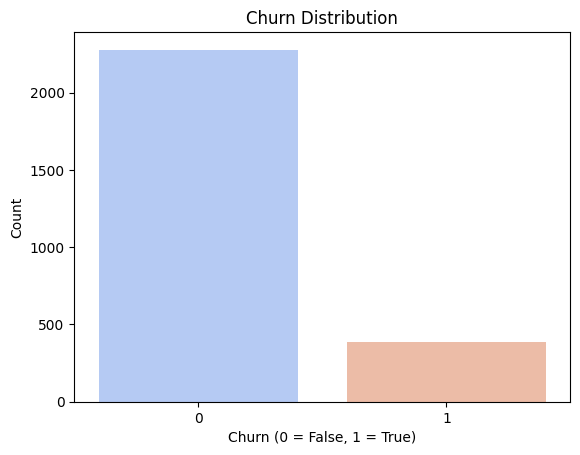

In [54]:
# Analyzing Churn Distribution
#We check the number of churners and non-churners to understand the balance of the dataset.
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = False, 1 = True)')
plt.ylabel('Count')
plt.show()

In [62]:
# Data Preprocessing 

# Target variable (Churn)
target = 'Churn'
y = df[target]

# Convert categorical target into binary (Yes=1, No=0)

y = y.map({'True': 1, 'False': 0})

df = df.drop(State, axis=1)

# Drop target column from features
X = df.drop(target, axis=1)   

# Handle categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Categorical variables:",len(cat_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))



NameError: name 'State' is not defined

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols = ['State', 'International plan','Voice mail plan','Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [51]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [52]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

ValueError: Input y contains NaN.